In [1]:
import numpy as np
import skimage.transform
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage.morphology import medial_axis, watershed
create_dist_map = lambda img, mask=None: medial_axis(img,mask, return_distance = True)[1]
import os
from skimage.measure import block_reduce
plt_settings = {'interpolation':'none'}
%matplotlib inline

# Distance Maps
Here we calculate distance maps with the ```ndimage.distance_transform_``` family of functions. Initially we focus on test images since it is easier to see what is happening with these images.

In [2]:
def generate_dot_image(size = 100, cutoff = 0.15):
    """
    Create a simple  synthetic image with a repeating pattern
    Keyword arguments:
    size -- the size of the image on one size, final size is size x size (default 100)
    imag -- the cutoff between 0 and 1, higher means less connected objects (default 0.15)
    """
    xx,yy = np.meshgrid(range(size),range(size))
    return np.sin(6*np.pi*xx/(100)-1)+1.25*np.cos(5*np.pi*yy/(100)-2)>cutoff

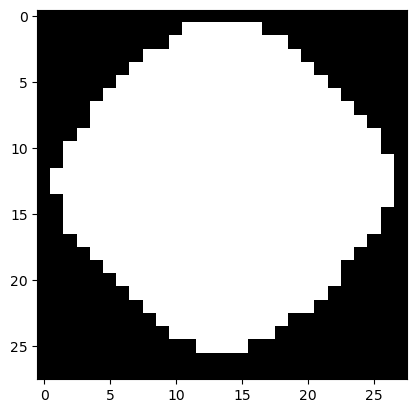

In [3]:
%matplotlib inline
img_bw = generate_dot_image(28,0.50)
plt.imshow(img_bw,cmap='gray', **plt_settings)

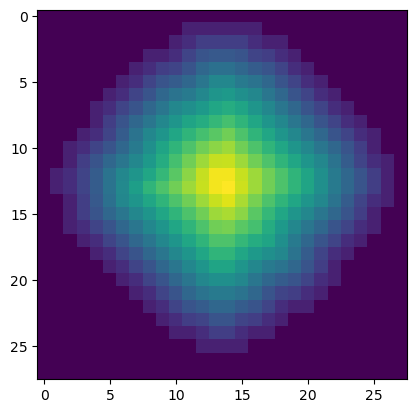

In [4]:
%matplotlib inline
img_dist = ndimage.distance_transform_edt(img_bw)
plt.imshow(img_dist, **plt_settings)


## Comparing 
There are a number of different methods for ```distance_transform``` inside the ```ndimage``` package of ```scipy``` compare the results of the different approaches for this and other images.
- What are the main differences?
- Quantitatively (histogram) show what situations each one might be best suited for?

Text(0.5, 1.0, 'Distance\n(px)')

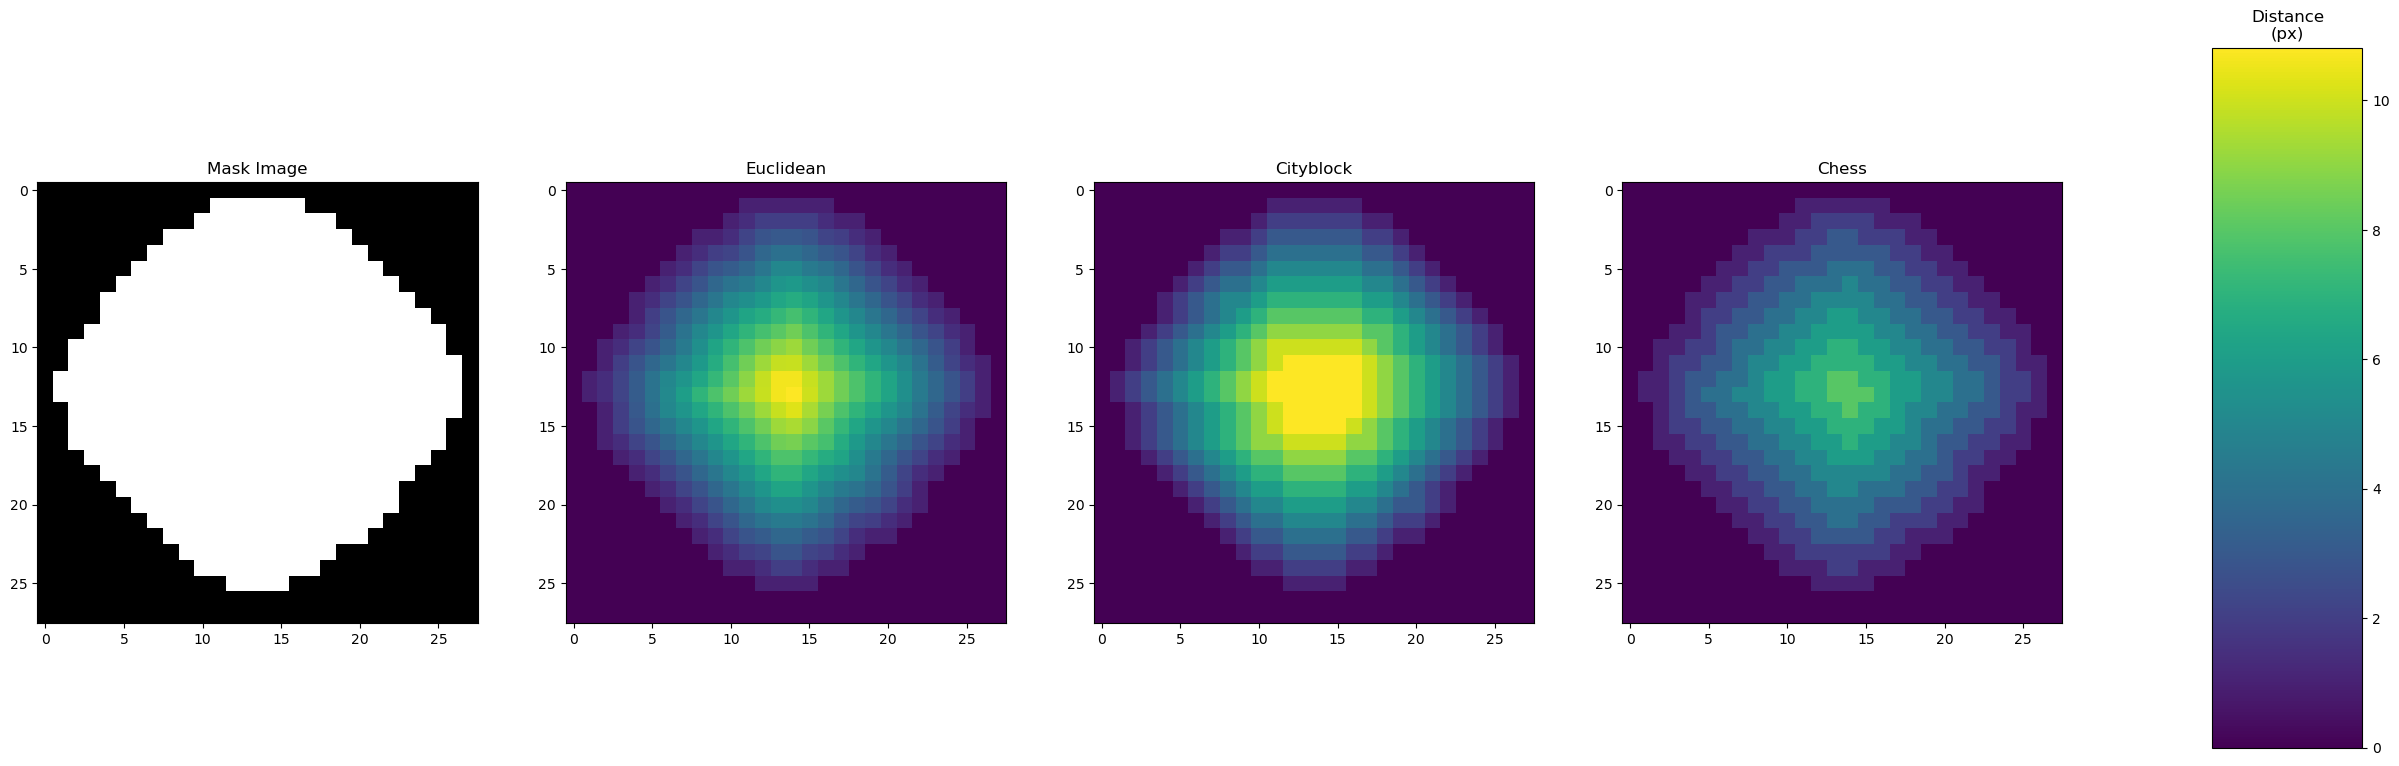

In [5]:
%matplotlib inline
# calculate new distance transforms
img_dist = ndimage.distance_transform_edt(img_bw)
img_dist_cityblock = ndimage.distance_transform_cdt(img_bw,metric = 'taxicab')
img_dist_chess = ndimage.distance_transform_cdt(img_bw,metric = 'chessboard')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize = (30,10))
ax1.imshow(img_bw,cmap = 'gray', **plt_settings)
ax1.set_title('Mask Image')
dmap_im = ax2.imshow(img_dist,vmax = img_dist.max(), **plt_settings)
ax2.set_title('Euclidean')
ax3.imshow(img_dist_cityblock,vmax = img_dist.max(), **plt_settings)
ax3.set_title('Cityblock')
ax4.imshow(img_dist_chess,vmax = img_dist.max(), **plt_settings)
ax4.set_title('Chess')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(dmap_im,cax=cbar_ax)
cbar_ax.set_title('Distance\n(px)')


## More Complicated Objects
We now make the image bigger (changing the ```size``` parameter) and connect them together (the ```cutoff``` parameter)

Text(0.5, 1.0, 'Distance\n(px)')

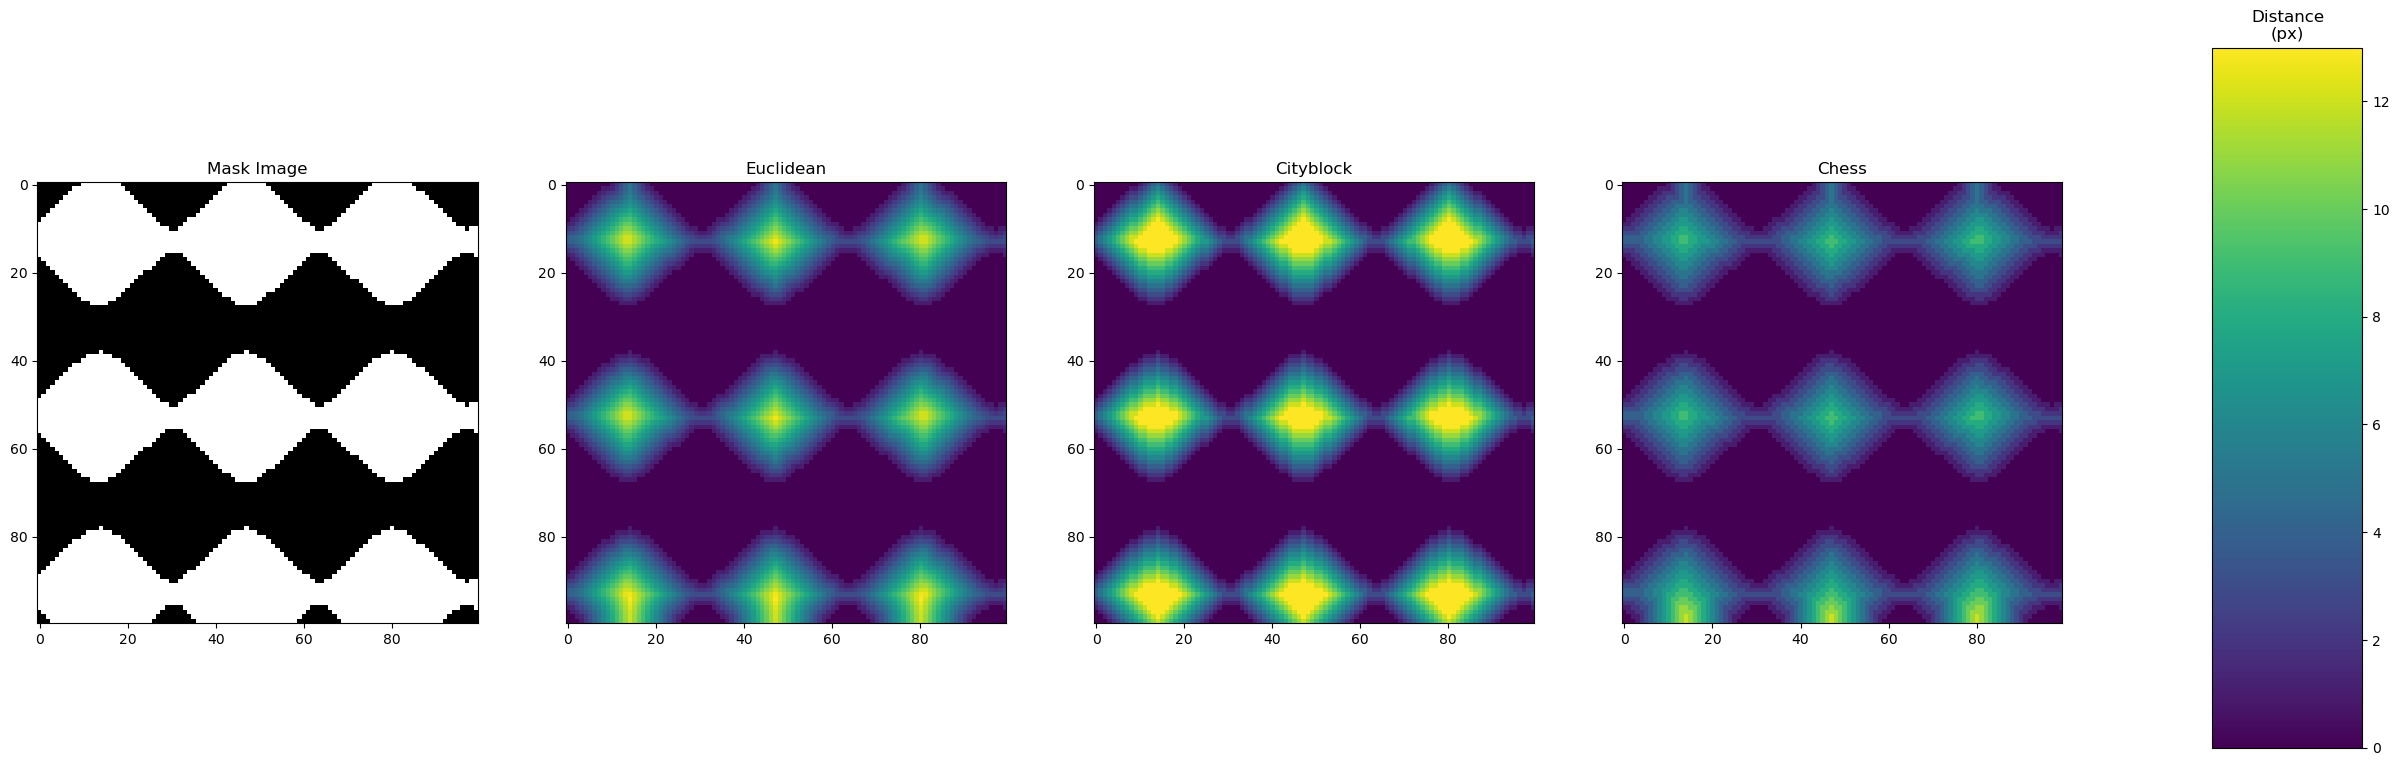

In [6]:
%matplotlib inline
# use a bigger base image
img_bw = generate_dot_image(100,0.15)
img_dist = ndimage.distance_transform_edt(img_bw)
img_dist_cityblock = ndimage.distance_transform_cdt(img_bw,metric = 'taxicab')
img_dist_chess = ndimage.distance_transform_cdt(img_bw,metric = 'chessboard')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize = (30,10))
ax1.imshow(img_bw,cmap = 'gray', **plt_settings)
ax1.set_title('Mask Image')
dmap_im = ax2.imshow(img_dist,vmax = img_dist.max(), **plt_settings)
ax2.set_title('Euclidean')
ax3.imshow(img_dist_cityblock,vmax = img_dist.max(), **plt_settings)
ax3.set_title('Cityblock')
ax4.imshow(img_dist_chess,vmax = img_dist.max(), **plt_settings)
ax4.set_title('Chess')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(dmap_im,cax=cbar_ax)
cbar_ax.set_title('Distance\n(px)')


# Watershed
We can use the watershed transform to segment closely connected objects. We see in the first image that the standard connected component labeling ```ndimage.label``` shows only 3 when we see 9

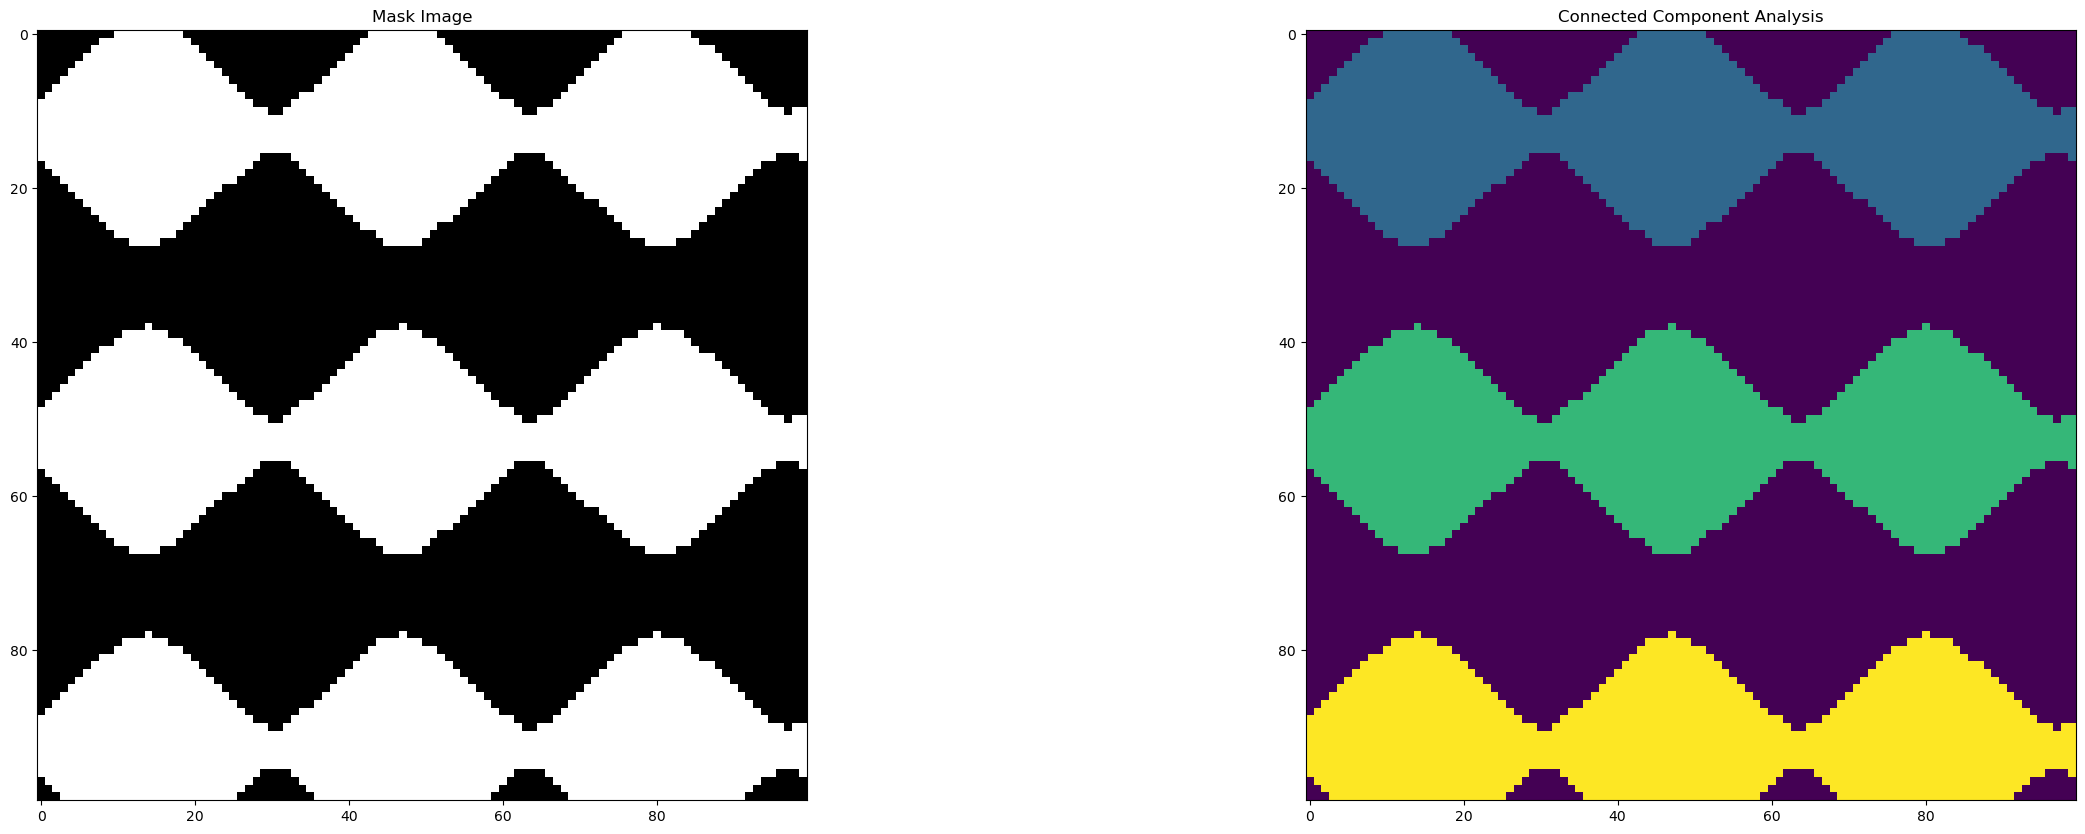

In [7]:
cc_img = ndimage.label(img_bw)[0]

%matplotlib inline
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (30,10))
ax1.imshow(img_bw,cmap = 'gray', **plt_settings)
ax1.set_title('Mask Image')
dmap_im = ax2.imshow(cc_img, **plt_settings)
ax2.set_title('Connected Component Analysis');

In [8]:
from skimage.feature import peak_local_max
def simple_watershed(img_dist, img_bw):
    """
    Calculate the watershed transform on an image and its distance map 
    by finding the troughs and expanding from these points
    """
    local_maxi = peak_local_max(img_dist, labels=img_bw,
                                footprint=np.ones((3, 3)),
                                indices=False)
    markers = ndimage.label(local_maxi)[0]
    return watershed(-img_dist,markers,mask = img_bw)

## Applying Watershed
We can apply watershed to the following image. 
- Why do the bottom row of objects not show up?
- How can the results be improved

/tmp/ipykernel_188541/842903605.py:7: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(img_dist, labels=img_bw,
/home/daveni/miniconda3/envs/qbi2024/lib/python3.9/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Text(0.5, 1.0, 'Watershed Analysis')

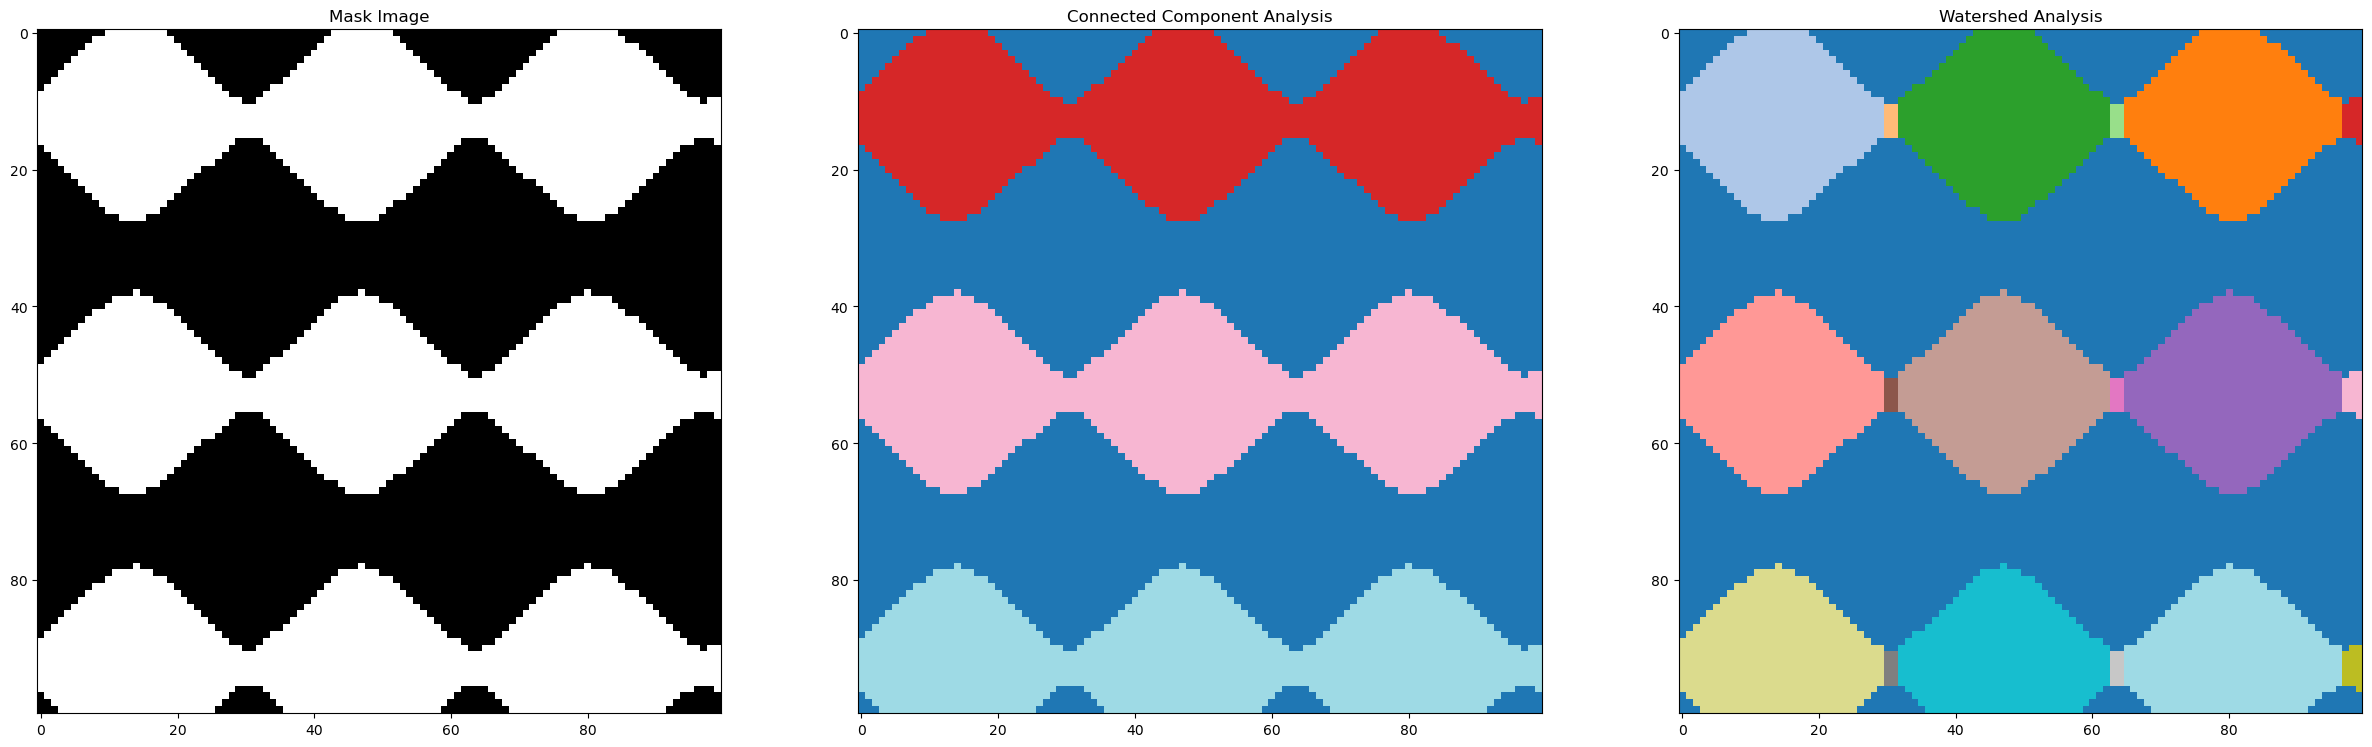

In [9]:
ws_img = simple_watershed(img_dist,img_bw)
%matplotlib inline
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (30,10))
ax1.imshow(img_bw,cmap = 'gray', **plt_settings)
ax1.set_title('Mask Image')
ax2.imshow(cc_img, cmap="tab20",**plt_settings)
ax2.set_title('Connected Component Analysis')
ax3.imshow(ws_img, cmap="tab20",**plt_settings)
ax3.set_title('Watershed Analysis')